# Mobile Activity & Usage Prediction Dataset 

Topic:
Study and manipulation of data from different sources for class classification using 
artificial intelligence (AI) algorithms.

The data acquisition can be done using datasets available on the web or else acquired
through systems with sensors.

The dataset must have at least **5 features** (columns with different characteristics).

## Project Requirements 

<input type="checkbox"/> Analysis of Dataset Features.

<input type="checkbox"/> Preparation of the data to put into an AI model.

<input type="checkbox"/> Study of the most suitable Ai model for the chosen dataset.

<input type="checkbox"/> Application of the selected Ai model to the dataset with and without the application of PCA/LDA techniques.

<input type="checkbox"/> Analysis of the Ai model training (Confusion matrix, learning curves, etc...).

<input type="checkbox"/> Study of the most important features of the dataset (feature importance) to improve the accuracy of the Ai model.

<input type="checkbox"/> Feature Importance self Obtained.

## Valorization of the Process

<input type="checkbox"/>  Hardware for acquiring the dataset.

<input type="checkbox"/>  Application of data combination techniques (example: data alignment, 
downsampling/upsampling, etc...).

<input type="checkbox"/>  Application of data quality improvement techniques (example: filters).

<input type="checkbox"/>  Extraction of additional features from the initial data (example: FFT/MFCC from an audio window 
from an audio window, etc...).

<input type="checkbox"/>  Other approaches...

## Brief Description of the Work

The following code analyses two datasets collected from 6 different cell phones using the as a collection method Home Assistant resources to gather data from 51 different features with the objective of test and develop skills in the field of data fusion according with the project defined by the professor V. Oliveira (voliveira@ipca.pt)

The authors of the following project and respective data are: 

@fandrepm18
@JoaquinDillen
@nunof98




# Load Dataset

In [1]:
import pandas as pd

filename = 'reclassifying_features/dataset_v1.csv'

# load dataset
df = pd.read_csv(f'datasets/{filename}')
df

,time,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
0,2023-01-17 00:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,0.00,0.0,off,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
1,2023-01-17 00:30:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,22.20,0.0,off,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2,2023-01-17 00:45:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.80,0.0,off,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
3,2023-01-17 01:00:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.90,0.0,off,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
4,2023-01-17 01:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.60,0.0,off,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,2023-01-26 19:00:00,0.01175,-0.002500,android.intent.action.SCREEN_ON,21.333333,9.00,0.0,18.25,0.0,off,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B
5660,2023-01-26 19:15:00,0.01450,0.000000,android.net.wifi.STATE_CHANGE,13.500000,10.00,0.0,17.60,0.0,off,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B
5661,2023-01-26 19:30:00,0.01200,-0.003333,android.intent.action.PHONE_STATE,0.666667,11.75,0.0,17.15,0.0,off,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B
5662,2023-01-26 19:45:00,0.01150,0.000000,android.net.wifi.STATE_CHANGE,0.666667,16.00,0.0,17.15,0.0,off,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B


In [2]:
# set timestamp column as index
df = df.set_index('time')
df

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,0.00,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 00:30:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,22.20,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 00:45:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.80,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 01:00:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.90,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
2023-01-17 01:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,0.0,21.60,0.0,off,0.0,...,none,good,transmitting,unavaliable,unavaliable,off,off,off,off,SMG960F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,android.intent.action.SCREEN_ON,21.333333,9.00,0.0,18.25,0.0,off,341.0,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B
2023-01-26 19:15:00,0.01450,0.000000,android.net.wifi.STATE_CHANGE,13.500000,10.00,0.0,17.60,0.0,off,341.0,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B
2023-01-26 19:30:00,0.01200,-0.003333,android.intent.action.PHONE_STATE,0.666667,11.75,0.0,17.15,0.0,off,351.0,...,none,good,Transmitting,unavaliable,unavaliable,on,off,off,off,SMA528B


## Analysis of dataset features
Analyses the statistical information about each variable.

In [3]:
df.describe()

,app_memory,battery_power,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,...,total_rx_gb,proximity_sensor,steps_sensor,volume_level_call,volume_level_music,volume_level_accessibility,mobile_rx_gb,mobile_tx_gb,volume_level_system,bluetooth_connection
count,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,...,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000
mean,0.012281,-0.082329,65.701824,2.571404,212.029130,19.840668,22.161800,115.261931,54.308467,-24.095224,...,12.011089,2.288899,21117.117435,2.708451,4.004726,3.812421,0.671618,0.035222,0.962688,0.332182
std,0.012065,0.414615,429.619220,3.731159,412.718471,8.586159,36.712059,160.083058,32.112288,29.331055,...,15.779058,2.344625,30595.807787,3.046022,5.132431,4.328333,1.292121,0.068907,2.355609,0.457608
min,0.000000,-3.010000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,0.000000,0.000000,29.000000,-54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012000,0.000000,0.000000,1.000000,0.000000,21.400000,0.000000,0.000000,58.000000,-1.000000,...,3.171000,2.500000,7169.500000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.021000,0.000000,21.714286,3.800000,0.000000,25.050000,27.000000,234.000000,81.000000,0.000000,...,18.885000,5.000000,44298.000000,6.000000,7.000000,7.333333,0.726000,0.039000,0.000000,0.500000
max,0.064000,5.480000,15635.727273,22.500000,1029.650000,41.300000,237.500000,680.200000,100.000000,0.000000,...,52.314000,8.000000,102229.000000,8.000000,24.000000,15.000000,5.681000,0.340500,14.000000,2.000000


## Correlation Matrix

Analyses the relationship between features

In [4]:
df.corr()

,app_memory,battery_power,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,...,total_rx_gb,proximity_sensor,steps_sensor,volume_level_call,volume_level_music,volume_level_accessibility,mobile_rx_gb,mobile_tx_gb,volume_level_system,bluetooth_connection
app_memory,1.000000,-0.184740,0.087315,0.400102,0.418809,0.387141,0.380798,0.441434,0.182153,-0.657991,...,0.783166,0.614108,0.514168,0.732092,0.471175,0.527215,0.394001,0.354011,0.213026,0.270706
battery_power,-0.184740,1.000000,-0.060310,0.023641,-0.383777,-0.104249,-0.024600,0.088871,0.118228,0.224936,...,-0.117679,-0.116737,-0.473894,-0.203197,-0.299321,-0.180331,-0.301876,-0.227809,0.080951,0.090277
light_sensor,0.087315,-0.060310,1.000000,0.060464,0.071792,0.088821,0.252241,-0.014264,0.019489,-0.045201,...,0.046681,0.100004,0.112246,0.033766,0.098506,0.097020,0.105413,0.116515,0.092750,0.110877
active_notification_count,0.400102,0.023641,0.060464,1.000000,-0.119680,0.266196,0.162352,0.377088,0.252253,-0.284476,...,0.395455,0.481239,0.155630,0.287759,0.257534,0.327668,0.011821,0.035942,0.251388,0.388822
pressure_sensor,0.418809,-0.383777,0.071792,-0.119680,1.000000,0.197183,0.406933,-0.105498,-0.030725,-0.401690,...,0.157626,0.280431,0.806375,0.431318,0.520394,0.478937,0.764092,0.701670,-0.067259,0.205197
battery_temperature,0.387141,-0.104249,0.088821,0.266196,0.197183,1.000000,0.209966,0.215123,0.566486,-0.256714,...,0.334376,0.423999,0.260173,0.351863,0.332621,0.360843,0.220213,0.204856,0.102072,0.277686
screen_brightness,0.380798,-0.024600,0.252241,0.162352,0.406933,0.209966,1.000000,0.131342,0.059734,-0.195877,...,0.154318,0.337136,0.378540,0.222730,0.331106,0.405315,0.495836,0.531578,0.275782,0.373330
wifi_link_speed,0.441434,0.088871,-0.014264,0.377088,-0.105498,0.215123,0.131342,1.000000,0.242070,-0.533629,...,0.340637,0.566846,0.033463,0.451346,0.304306,0.387914,-0.107210,-0.101568,0.402600,0.377567
battery_level,0.182153,0.118228,0.019489,0.252253,-0.030725,0.566486,0.059734,0.242070,1.000000,-0.150293,...,0.196760,0.289937,-0.020505,0.203466,0.150401,0.223973,-0.034062,0.000805,0.171737,0.274115
wifi_signal_strength,-0.657991,0.224936,-0.045201,-0.284476,-0.401690,-0.256714,-0.195877,-0.533629,-0.150293,1.000000,...,-0.541789,-0.543599,-0.469045,-0.626914,-0.503656,-0.522985,-0.223005,-0.166336,-0.171399,-0.215352


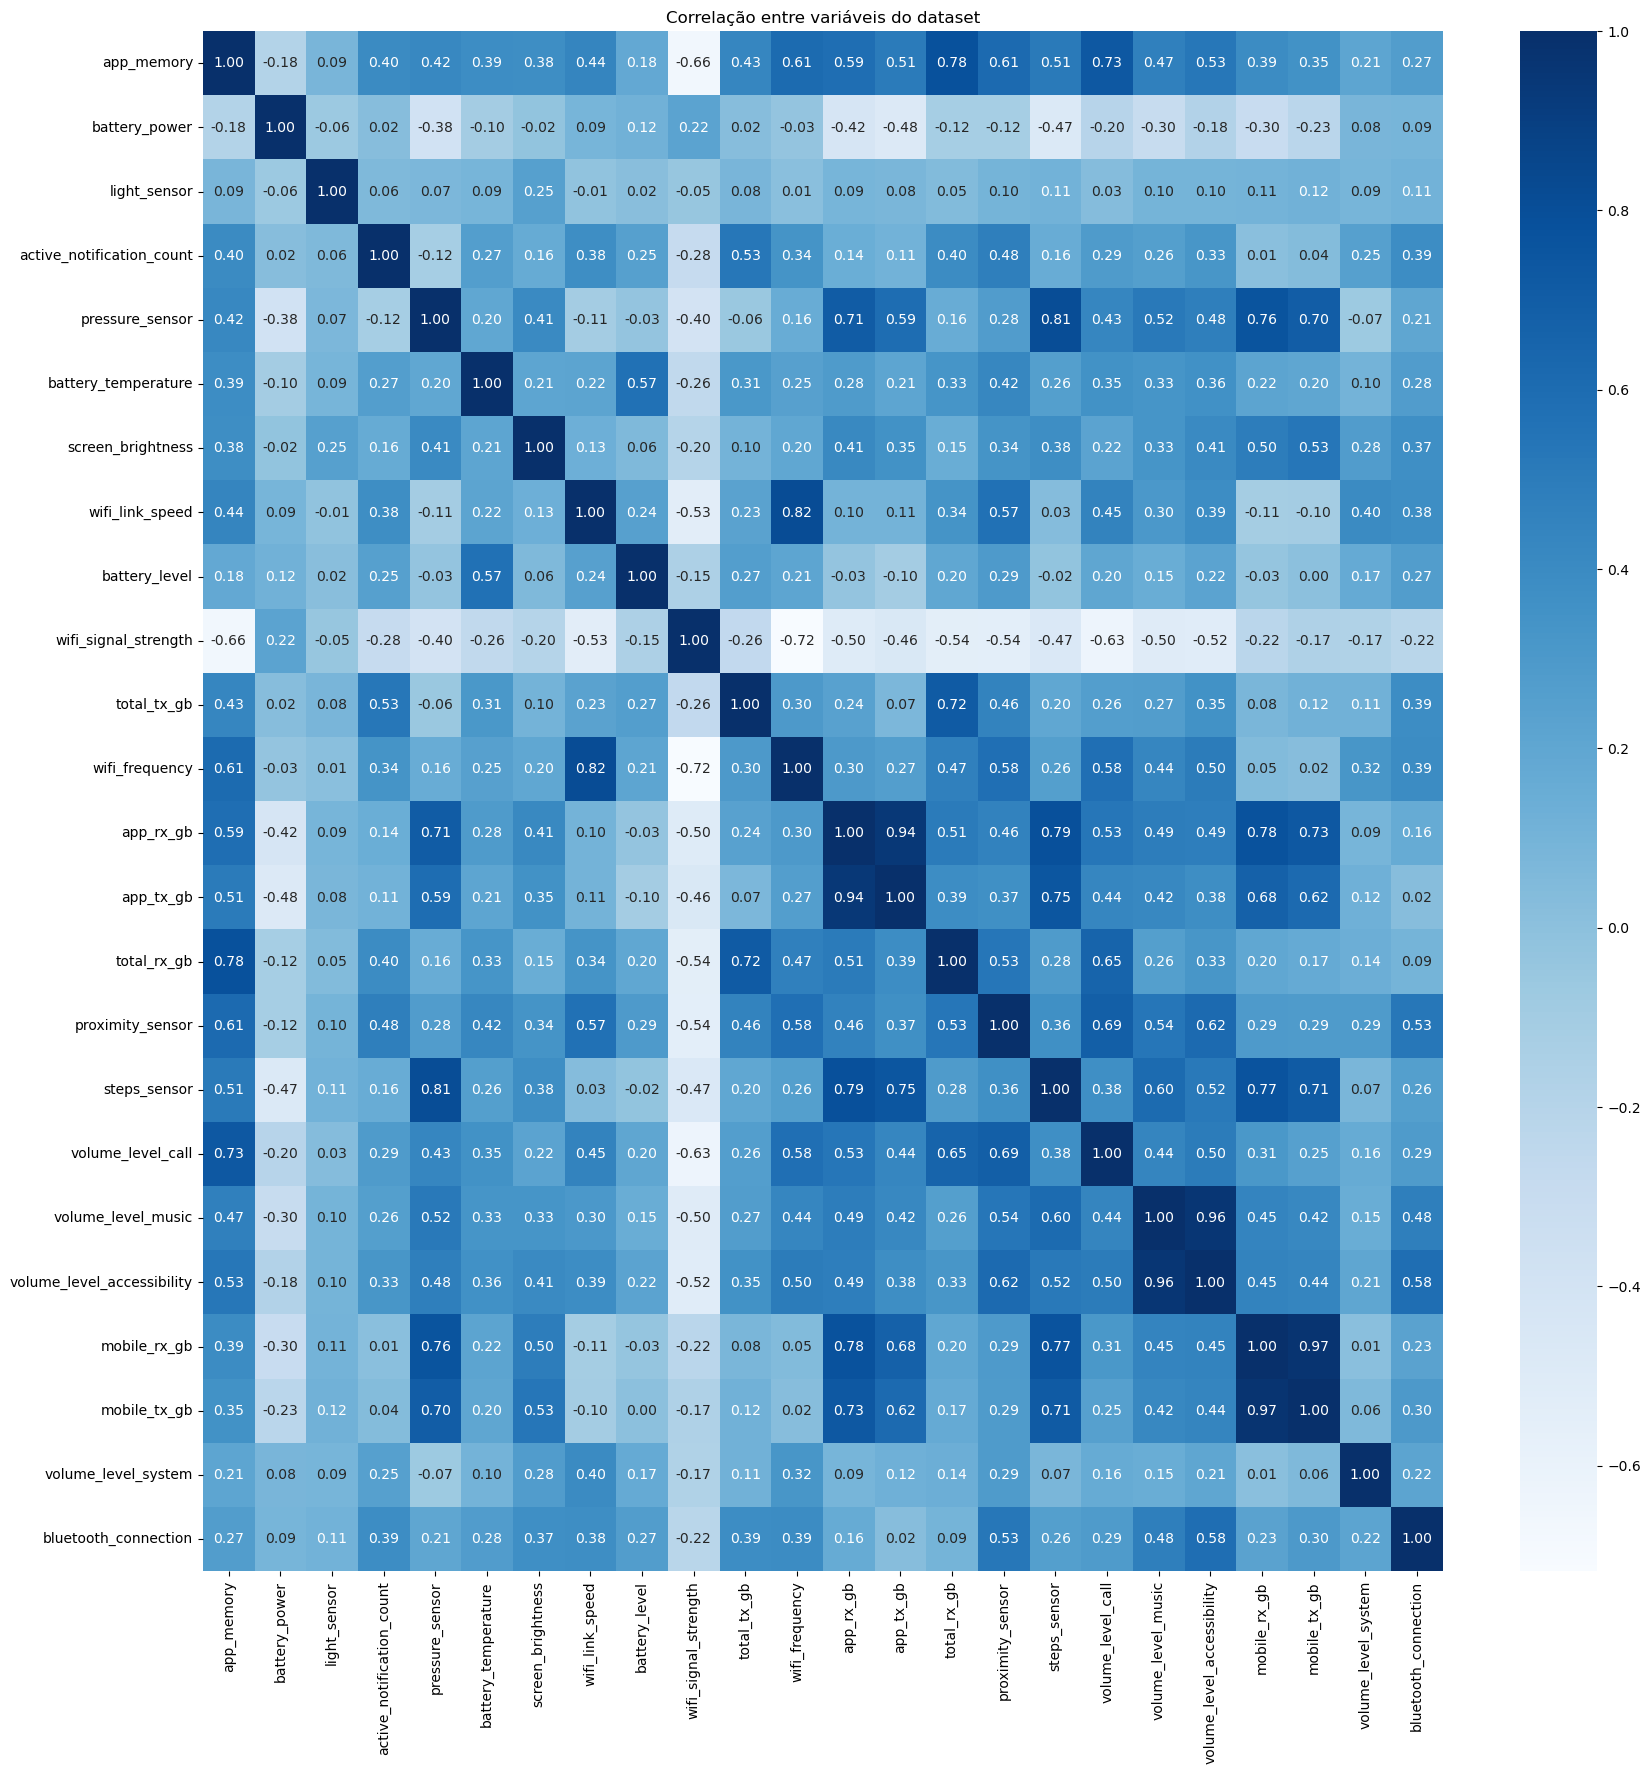

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True,fmt = '.2f',cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5664 entries, 2023-01-17 00:15:00 to 2023-01-26 20:00:00
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_memory                  5664 non-null   float64
 1   battery_power               5664 non-null   float64
 2   last_update_trigger         5664 non-null   object 
 3   light_sensor                5664 non-null   float64
 4   active_notification_count   5664 non-null   float64
 5   pressure_sensor             5664 non-null   float64
 6   battery_temperature         5664 non-null   float64
 7   screen_brightness           5664 non-null   float64
 8   device_locked               5664 non-null   object 
 9   wifi_link_speed             5664 non-null   float64
 10  interactive                 5664 non-null   object 
 11  doze_mode                   5664 non-null   object 
 12  battery_level               5664 non-null   float64
 13  wifi_

app_memory                    0
battery_power                 0
last_update_trigger           0
light_sensor                  0
active_notification_count     0
pressure_sensor               0
battery_temperature           0
screen_brightness             0
device_locked                 0
wifi_link_speed               0
interactive                   0
doze_mode                     0
battery_level                 0
wifi_signal_strength          0
total_tx_gb                   0
wifi_frequency                0
app_rx_gb                     0
app_tx_gb                     0
last_used_app                 0
total_rx_gb                   0
detected_activity             0
proximity_sensor              0
steps_sensor                  0
headphones                    0
volume_level_call             0
volume_level_music            0
volume_level_accessibility    0
music_active                  0
wifi_connection               0
network_type                  0
mobile_rx_gb                  0
mobile_t

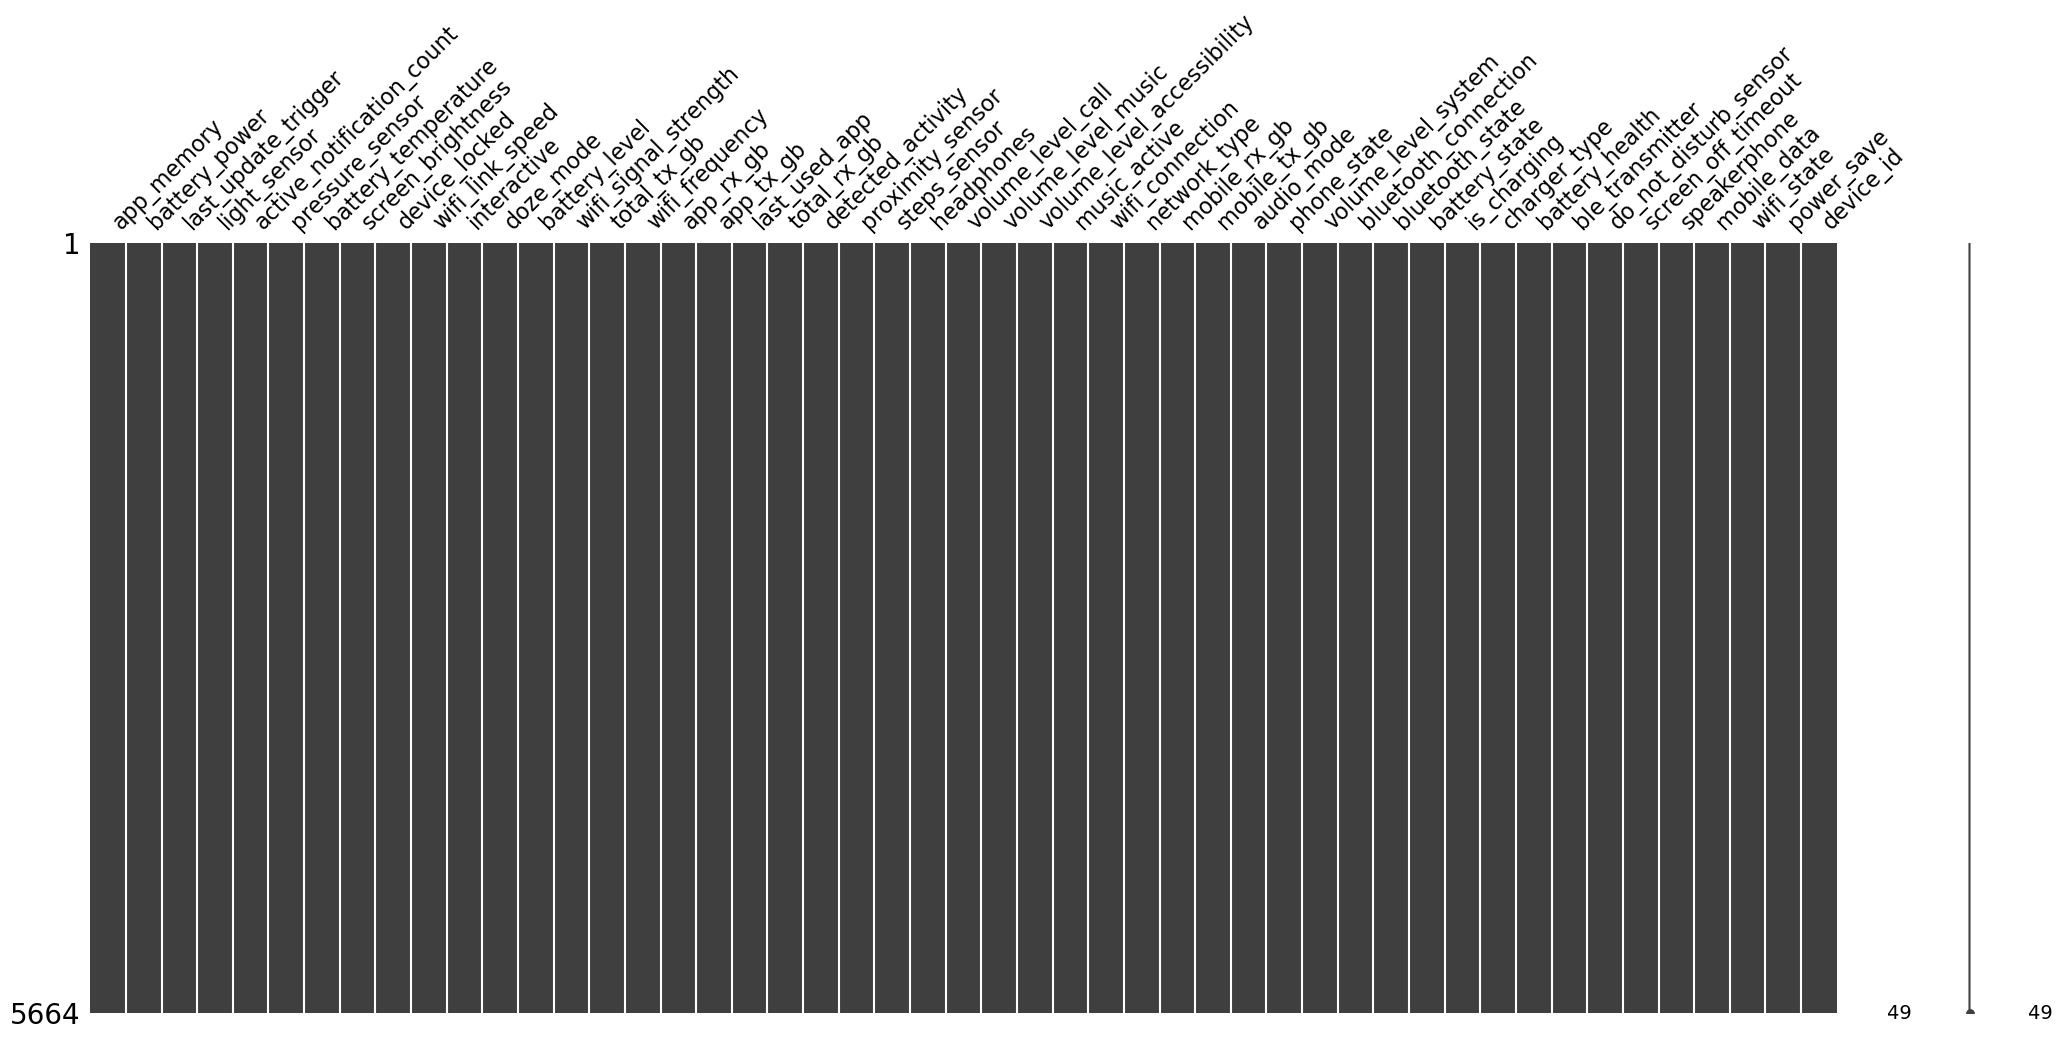

In [7]:
import missingno as msno

# check for missing values
msno.matrix(df)
df.isnull().sum()

In [8]:
df.dtypes

app_memory                    float64
battery_power                 float64
last_update_trigger            object
light_sensor                  float64
active_notification_count     float64
pressure_sensor               float64
battery_temperature           float64
screen_brightness             float64
device_locked                  object
wifi_link_speed               float64
interactive                    object
doze_mode                      object
battery_level                 float64
wifi_signal_strength          float64
total_tx_gb                   float64
wifi_frequency                float64
app_rx_gb                     float64
app_tx_gb                     float64
last_used_app                  object
total_rx_gb                   float64
detected_activity              object
proximity_sensor              float64
steps_sensor                  float64
headphones                     object
volume_level_call             float64
volume_level_music            float64
volume_level

<AxesSubplot: >

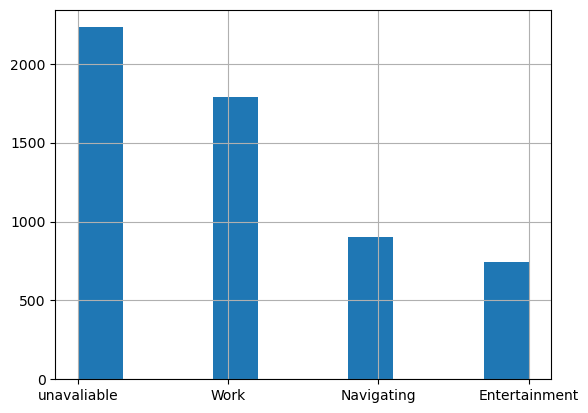

In [9]:
df['last_used_app'].hist()

## Encode categorical features

In [10]:
import category_encoders as ce

# select categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove('last_used_app')

encoder = ce.OrdinalEncoder(cols=cat_cols)
df = encoder.fit_transform(df)
df

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,0.00,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:30:00,0.00000,0.000000,1,0.000000,0.00,0.0,22.20,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:45:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.80,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:00:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.90,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.60,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,3,21.333333,9.00,0.0,18.25,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:15:00,0.01450,0.000000,10,13.500000,10.00,0.0,17.60,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:30:00,0.01200,-0.003333,11,0.666667,11.75,0.0,17.15,0.0,1,351.0,...,1,1,3,1,1,2,1,1,1,6


In [11]:
df.describe()

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
count,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,...,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000
mean,0.012281,-0.082329,4.059322,65.701824,2.571404,212.029130,19.840668,22.161800,1.324153,115.261931,...,1.432203,1.424082,2.014301,1.099047,1.099223,1.576977,1.618997,1.517655,1.168785,3.500000
std,0.012065,0.414615,4.191641,429.619220,3.731159,412.718471,8.586159,36.712059,0.734467,160.083058,...,0.607209,0.494246,1.217467,0.317658,0.389296,0.742784,0.863222,0.726900,0.463128,1.707976
min,0.000000,-3.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.400000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,0.012000,0.000000,1.000000,0.000000,1.000000,0.000000,21.400000,0.000000,1.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.500000
75%,0.021000,0.000000,7.000000,21.714286,3.800000,0.000000,25.050000,27.000000,1.000000,234.000000,...,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,5.000000
max,0.064000,5.480000,21.000000,15635.727273,22.500000,1029.650000,41.300000,237.500000,3.000000,680.200000,...,4.000000,2.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


## Get features and labels

In [12]:
# get features
X = df.drop(['last_used_app'], axis=1)
X

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,device_locked,wifi_link_speed,...,charger_type,battery_health,ble_transmitter,do_not_disturb_sensor,screen_off_timeout,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,0.00,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:30:00,0.00000,0.000000,1,0.000000,0.00,0.0,22.20,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 00:45:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.80,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:00:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.90,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
2023-01-17 01:15:00,0.00000,0.000000,1,0.000000,0.00,0.0,21.60,0.0,1,0.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,3,21.333333,9.00,0.0,18.25,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:15:00,0.01450,0.000000,10,13.500000,10.00,0.0,17.60,0.0,1,341.0,...,1,1,3,1,1,2,1,1,1,6
2023-01-26 19:30:00,0.01200,-0.003333,11,0.666667,11.75,0.0,17.15,0.0,1,351.0,...,1,1,3,1,1,2,1,1,1,6


In [13]:
# get labels
y = df['last_used_app']
y

time
2023-01-17 00:15:00    unavaliable
2023-01-17 00:30:00    unavaliable
2023-01-17 00:45:00    unavaliable
2023-01-17 01:00:00    unavaliable
2023-01-17 01:15:00    unavaliable
                          ...     
2023-01-26 19:00:00     Navigating
2023-01-26 19:15:00     Navigating
2023-01-26 19:30:00     Navigating
2023-01-26 19:45:00     Navigating
2023-01-26 20:00:00     Navigating
Name: last_used_app, Length: 5664, dtype: object

## Split dataset into train and test sets

In [14]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3964, 48) (1700, 48) (3964,) (1700,)


## Feature importance

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
model  = RandomForestClassifier()
model.fit(X_train, y_train)
model.feature_importances_


array([0.03027786, 0.00613906, 0.00959565, 0.01781008, 0.03368003,
       0.01103692, 0.01871298, 0.02963068, 0.00396446, 0.02461797,
       0.01003523, 0.        , 0.02627576, 0.05221695, 0.10189163,
       0.01267099, 0.09325426, 0.03304604, 0.09789921, 0.00737733,
       0.01635346, 0.04796061, 0.00195774, 0.01248187, 0.04146577,
       0.06575658, 0.00862861, 0.01152601, 0.00822612, 0.01850096,
       0.0142453 , 0.00830237, 0.00697896, 0.00521996, 0.00835957,
       0.00300494, 0.01018415, 0.01891233, 0.01131101, 0.01746208,
       0.01162018, 0.00545304, 0.00132949, 0.00576096, 0.00374554,
       0.00461609, 0.00469085, 0.00581239])

Text(0.5, 1.0, 'Importance of each feature')

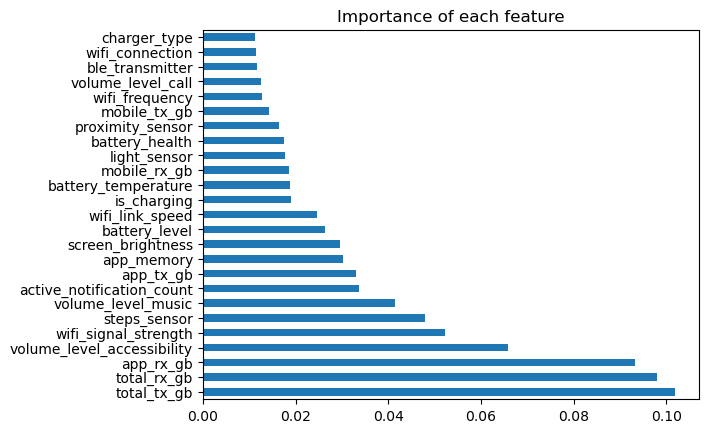

In [16]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh').set_title('Importance of each feature')

## Sklearn SelectKBest

In [17]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

print (X.shape)

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
print (X_new.shape)


(5664, 48)


ValueError: Input X must be non-negative.

## Coefficients

49
['active_notification_count', 'app_memory', 'app_rx_gb', 'app_tx_gb', 'audio_mode', 'battery_health', 'battery_level', 'battery_power', 'battery_state', 'battery_temperature', 'ble_transmitter', 'bluetooth_connection', 'bluetooth_state', 'charger_type', 'detected_activity', 'device_id', 'device_locked', 'do_not_disturb_sensor', 'doze_mode', 'headphones', 'interactive', 'is_charging', 'last_update_trigger', 'last_used_app', 'light_sensor', 'mobile_data', 'mobile_rx_gb', 'mobile_tx_gb', 'music_active', 'network_type', 'phone_state', 'power_save', 'pressure_sensor', 'proximity_sensor', 'screen_brightness', 'screen_off_timeout', 'speakerphone', 'steps_sensor', 'total_rx_gb', 'total_tx_gb', 'volume_level_accessibility', 'volume_level_call', 'volume_level_music', 'volume_level_system', 'wifi_connection', 'wifi_frequency', 'wifi_link_speed', 'wifi_signal_strength', 'wifi_state']


C:\Users\Andre\anaconda3\envs\aulas_fusao\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Andre\anaconda3\envs\aulas_fusao\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: index 181 is out of bounds for axis 0 with size 49

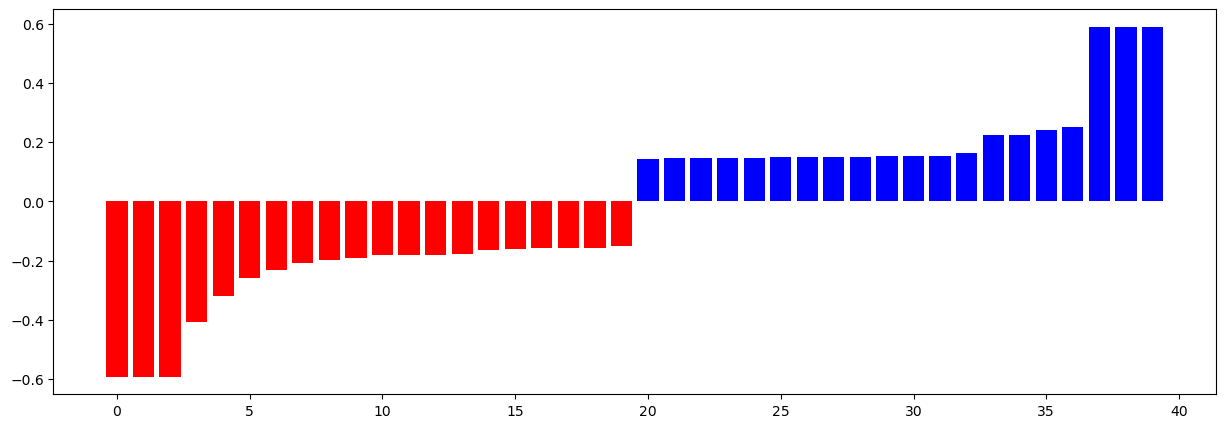

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(df)
print (len(cv.vocabulary_))
print (cv.get_feature_names())


svm = LinearSVC()
svm.fit(X_train, y_train)
plot_coefficients(svm, cv.get_feature_names())

## Sklearn SelectFromModel

In [63]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(estimator=LogisticRegression(),threshold=0.015,prefit = False ,norm_order = 1 , max_features = 5).fit(X, y)


#selector.get_support()

selector.transform(X)


C:\Users\Andre\anaconda3\envs\aulas_fusao\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.  , 74.  ],
       [22.2 , 73.  ],
       [21.8 , 72.  ],
       ...,
       [17.15, 75.  ],
       [17.15, 75.  ],
       [17.15, 75.  ]])

# AdaBoost Classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

y_pred_abc = abc.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_abc)
print (cm)
acc_abc = accuracy_score(y_test, y_pred_abc)
print (acc_abc)

[[ 67  91  64   0]
 [ 54 153  64   0]
 [126 216 195   0]
 [  0   0 667   3]]
0.24588235294117647


# Naïve Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [66]:
y_pred = nb.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_nb = accuracy_score(y_test, y_pred)
print(acc_nb)

[[134  28  60   0]
 [ 92  91  88   0]
 [178  30 309  20]
 [  1   0   3 666]]
0.7058823529411765


# Kernel SVM (Support Vector Machine)

In [17]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [18]:
y_pred_svc_rbf = svc_rbf.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svc_rbf)
print (cm)
acc_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf)
print (acc_svc_rbf)

[[  0  15 196  11]
 [  0  56 201  14]
 [  0  36 453  48]
 [  0   0   4 666]]
0.6911764705882353


# Classification models

In [20]:
scores = {}

## Decision tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

# build decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.60      0.25      0.35       222
   Navigating       0.92      0.25      0.39       271
         Work       0.58      0.94      0.72       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.76      1700
    macro avg       0.77      0.61      0.61      1700
 weighted avg       0.80      0.76      0.73      1700

Train accuracy:	 0.777497477295661
Test accuracy:	 0.7611764705882353


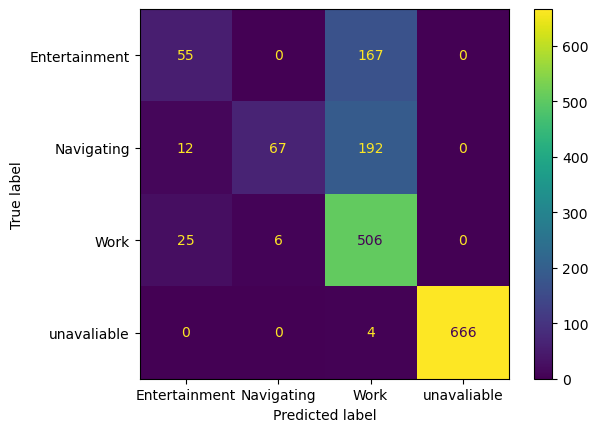

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# make prediction
y_pred_clf_gini = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred_clf_gini))
print(f'Train accuracy:\t {clf_gini.score(X_train, y_train)}')
print(f'Test accuracy:\t {clf_gini.score(X_test, y_test)}')
scores['Decision Tree'] =  clf_gini.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_clf_gini)

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
rfc = RandomForestClassifier()
# train random forest
rfc.fit(X_train, y_train)

RandomForestClassifier()

               precision    recall  f1-score   support

Entertainment       0.92      0.90      0.91       222
   Navigating       0.95      0.87      0.91       271
         Work       0.92      0.97      0.95       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.96      1700
    macro avg       0.95      0.94      0.94      1700
 weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 1.0
Test accuracy:	 0.9570588235294117


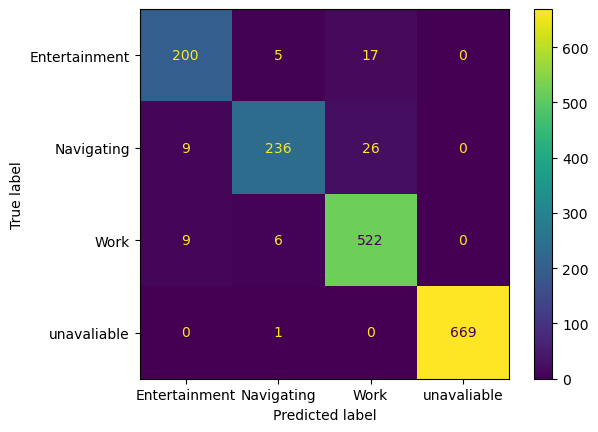

In [24]:
# make prediction
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
print(f'Train accuracy:\t {rfc.score(X_train, y_train)}')
print(f'Test accuracy:\t {rfc.score(X_test, y_test)}')
scores['Random Forest'] = rfc.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc)

## KNeighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
neigh = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

               precision    recall  f1-score   support

Entertainment       0.79      0.91      0.84       222
   Navigating       0.83      0.85      0.84       271
         Work       0.92      0.85      0.89       537
  unavaliable       1.00      0.99      0.99       670

     accuracy                           0.91      1700
    macro avg       0.88      0.90      0.89      1700
 weighted avg       0.92      0.91      0.92      1700

Train accuracy:	 0.9606458123107972
Test accuracy:	 0.9147058823529411


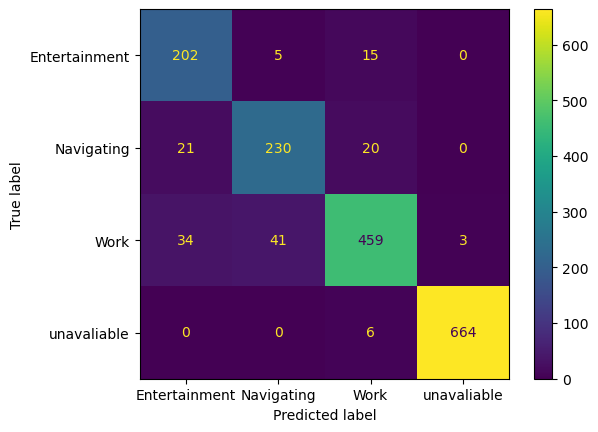

In [26]:
# make prediction
y_pred_neigh = neigh.predict(X_test)
print(classification_report(y_test, y_pred_neigh))
print(f'Train accuracy:\t {neigh.score(X_train, y_train)}')
print(f'Test accuracy:\t {neigh.score(X_test, y_test)}')
scores['KNN'] =  neigh.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_neigh)

## MLP

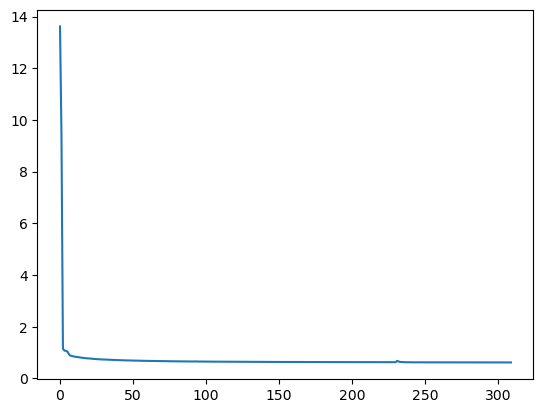

In [27]:
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

# build MLP classifier
model = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model.fit(X_train, y_train)
plt.plot(model.loss_curve_)

               precision    recall  f1-score   support

Entertainment       1.00      0.02      0.04       222
   Navigating       0.67      0.01      0.03       271
         Work       0.52      1.00      0.69       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.71      1700
    macro avg       0.80      0.51      0.44      1700
 weighted avg       0.80      0.71      0.62      1700

Train accuracy:	 0.7124117053481333
Test accuracy:	 0.7111764705882353


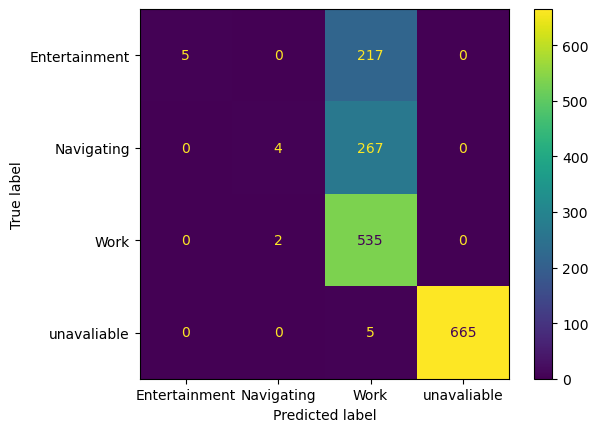

In [28]:
# make prediction
y_pred_mlp = model.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
print(f'Train accuracy:\t {model.score(X_train, y_train)}')
print(f'Test accuracy:\t {model.score(X_test, y_test)}')
scores['MLP'] =  model.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)

# PCA or LDA Usage

Our Dataset is presented with several datapoints so we can consider the fact that our dataset is a multi-sensor data fusion application, the need to keep the computational load low is very important, a low-dimensional common representational format may be the answer, to apply a dimension-reducing, or subspace technique to the raw input data. 

## PCA Classifier

In [29]:
scores_pca = {}

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_pca.shape, y.shape

((5664, 3), (5664,))

PCA variance_ratio
The percentage of the explained variance is: explained_variance_ratio_

The variance i.e. the eigenvalues of the covariance matrix is: explained_variance_

Formula: explained_variance_ratio_ = explained_variance_ / np.sum(explained_variance_)

In [31]:
pca.explained_variance_ratio_

array([9.94993815e-01, 4.73875466e-03, 1.93734535e-04])

In [32]:
pca.explained_variance_ratio_.sum()

0.999926304161788

In [33]:
# split X and y into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


# AdaBoost Classifier with PCA

In [34]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_pca, y_train_pca)

y_pred_abc = abc.predict(X_test_pca)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_pca, y_pred_abc)
print (cm)
acc_abc = accuracy_score(y_test_pca, y_pred_abc)
print (acc_abc)

[[ 75  21 126   0]
 [115  27 129   0]
 [155  55 325   2]
 [  0   2 668   0]]
0.2511764705882353


# Naïve Bayes with pca

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_pca, y_train_pca)

GaussianNB()

In [36]:
y_pred_pca = nb.predict(X_test_pca)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)
print(cm_pca)
acc_nb_pca = accuracy_score(y_test, y_pred_pca)
print(acc_nb_pca)

[[ 40   4 172   6]
 [ 57  16 188  10]
 [ 24  27 411  75]
 [  0   0   3 667]]
0.6670588235294118


# Kernel SVM (Support Vector Machine) with pca

In [38]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train_pca, y_train_pca)

SVC(random_state=0)

In [39]:
y_pred_svc_rbf_pca = svc_rbf.predict(X_test_pca)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca = confusion_matrix(y_test_pca, y_pred_svc_rbf_pca)
print (cm_pca)
acc_svc_rbf_pca = accuracy_score(y_test_pca, y_pred_svc_rbf_pca)
print (acc_svc_rbf_pca)

[[  0  15 196  11]
 [  0  56 202  13]
 [  0  36 456  45]
 [  0   0   4 666]]
0.6929411764705883


### Decision tree

In [41]:
# build decision tree classifier
clf_gini_pca = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_pca.fit(X_train_pca, y_train_pca)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.58      0.34      0.43       222
   Navigating       0.71      0.41      0.52       271
         Work       0.64      0.87      0.74       537
  unavaliable       0.97      0.99      0.98       670

     accuracy                           0.77      1700
    macro avg       0.72      0.65      0.67      1700
 weighted avg       0.77      0.77      0.76      1700

Train accuracy:	 0.777497477295661
Test accuracy:	 0.7747058823529411


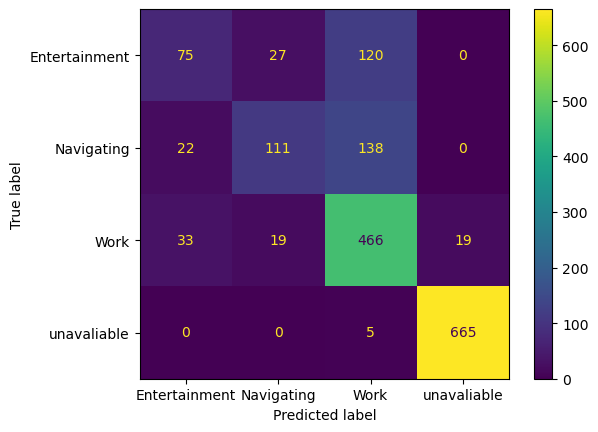

In [42]:
# make prediction
y_pred_clf_gini_pca = clf_gini_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_clf_gini_pca))
print(f'Train accuracy:\t {clf_gini_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {clf_gini_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Decision Tree PCA'] =  clf_gini_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_clf_gini_pca)

### Random Forest

In [43]:
# build random forest classifier
rfc_pca = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_pca.fit(X_train_pca, y_train_pca)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

               precision    recall  f1-score   support

Entertainment       0.77      0.80      0.78       222
   Navigating       0.84      0.84      0.84       271
         Work       0.86      0.85      0.86       537
  unavaliable       0.99      0.98      0.98       670

     accuracy                           0.89      1700
    macro avg       0.86      0.87      0.87      1700
 weighted avg       0.90      0.89      0.89      1700

Train accuracy:	 0.9846115035317861
Test accuracy:	 0.8941176470588236


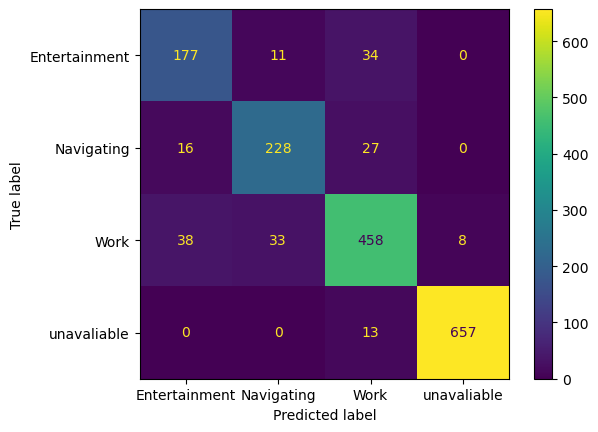

In [44]:
# make prediction
y_pred_rfc_pca = rfc_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_rfc_pca))
print(f'Train accuracy:\t {rfc_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {rfc_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Random Forest PCA'] = rfc_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_rfc_pca)

### KNeighbors Classifier

In [45]:
# build KNeighbors classifier
neigh_pca = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
neigh_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(n_neighbors=2)

               precision    recall  f1-score   support

Entertainment       0.77      0.89      0.83       222
   Navigating       0.82      0.87      0.85       271
         Work       0.88      0.84      0.86       537
  unavaliable       0.99      0.95      0.97       670

     accuracy                           0.90      1700
    macro avg       0.87      0.89      0.88      1700
 weighted avg       0.90      0.90      0.90      1700

Train accuracy:	 0.9513118062563067
Test accuracy:	 0.8952941176470588


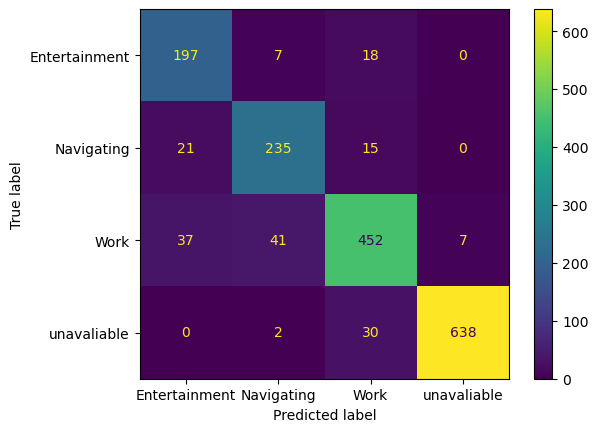

In [46]:
# make prediction
y_pred_neigh_pca = neigh_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_neigh_pca))
print(f'Train accuracy:\t {neigh_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {neigh_pca.score(X_test_pca, y_test_pca)}')
scores_pca['KNN PCA'] =  neigh_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_neigh_pca)

### MLP

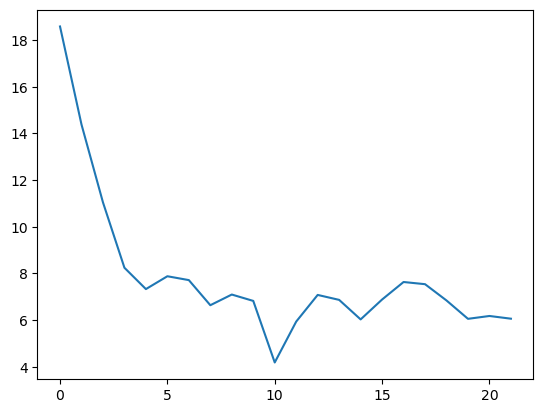

In [47]:
# build MLP classifier
model_pca = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_pca.fit(X_train_pca, y_train_pca)
plt.plot(model_pca.loss_curve_)

               precision    recall  f1-score   support

Entertainment       0.37      0.34      0.36       222
   Navigating       0.22      0.16      0.19       271
         Work       0.53      0.55      0.54       537
  unavaliable       0.91      0.99      0.95       670

     accuracy                           0.64      1700
    macro avg       0.51      0.51      0.51      1700
 weighted avg       0.61      0.64      0.62      1700

Train accuracy:	 0.6397578203834511
Test accuracy:	 0.6370588235294118


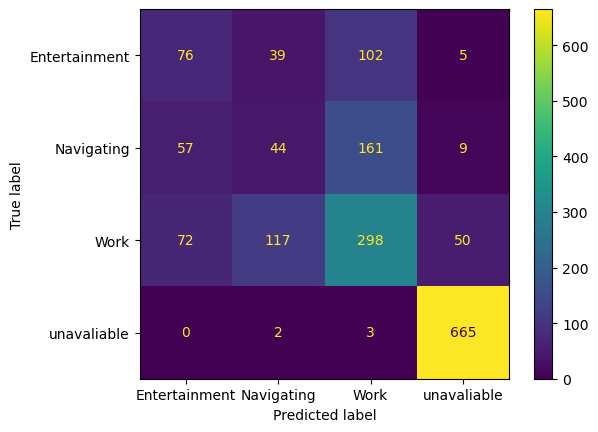

In [48]:
# make prediction
y_pred_mlp_pca = model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_mlp_pca))
print(f'Train accuracy:\t {model_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {model_pca.score(X_test_pca, y_test_pca)}')
scores_pca['MLP_PCA'] =  model_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_mlp_pca)

## LDA Classifier

In [49]:
scores_lda = {}

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X, y).transform(X)
X_lda.shape

(5664, 3)

In [51]:
# split X and y into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda.shape, X_test_lda.shape, y_train_lda.shape, y_test_lda.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


# AdaBoost Classifier with LDA

In [52]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_lda, y_train_lda)

y_pred_abc_lda = abc.predict(X_test_lda)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_lda, y_pred_abc_lda)
print (cm)
acc_abc_lda = accuracy_score(y_test_lda, y_pred_abc_lda)
print (acc_abc_lda)

[[155  39  28   0]
 [ 58 196  17   0]
 [ 80 197 256   4]
 [  0   0   1 669]]
0.7505882352941177


# Naïve Bayes with LDA

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_lda, y_train_lda)

GaussianNB()

In [54]:
y_pred_lda = nb.predict(X_test_lda)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_lda = confusion_matrix(y_test_lda, y_pred_lda)
print(cm_lda)
acc_nb_lda = accuracy_score(y_test_lda, y_pred_lda)
print(acc_nb_lda)

[[137  14  71   0]
 [ 37 132 101   1]
 [ 44  36 456   1]
 [  2   0   4 664]]
0.8170588235294117


# Kernel SVM (Support Vector Machine) with LDA

In [56]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train_pca, y_train_pca)

SVC(random_state=0)

In [57]:
y_pred_svc_rbf_pca = svc_rbf.predict(X_test_pca)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca = confusion_matrix(y_test_pca, y_pred_svc_rbf_pca)
print (cm_pca)
acc_svc_rbf_pca = accuracy_score(y_test_pca, y_pred_svc_rbf_pca)
print (acc_svc_rbf_pca)

[[  0  15 196  11]
 [  0  56 202  13]
 [  0  36 456  45]
 [  0   0   4 666]]
0.6929411764705883


### Decision tree

In [59]:
# build decision tree classifier
clf_gini_lda = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_lda.fit(X_train_lda, y_train_lda)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.66      0.59      0.62       222
   Navigating       0.78      0.49      0.60       271
         Work       0.70      0.87      0.78       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.82      1700
    macro avg       0.78      0.74      0.75      1700
 weighted avg       0.83      0.82      0.81      1700

Train accuracy:	 0.8375378405650857
Test accuracy:	 0.8205882352941176


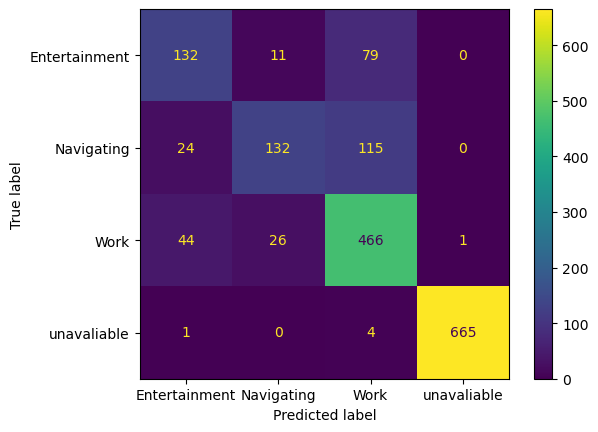

In [60]:
# make prediction
y_pred_clf_gini_lda = clf_gini_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_clf_gini_lda))
print(f'Train accuracy:\t {clf_gini_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {clf_gini_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Decision Tree LDA'] =  clf_gini_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_clf_gini_lda)

### Random Forest

In [61]:
# build random forest classifier
rfc_lda = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_lda.fit(X_train_lda, y_train_lda)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

               precision    recall  f1-score   support

Entertainment       0.67      0.77      0.72       222
   Navigating       0.78      0.72      0.75       271
         Work       0.84      0.82      0.83       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.87      1700
    macro avg       0.82      0.83      0.82      1700
 weighted avg       0.87      0.87      0.87      1700

Train accuracy:	 0.9808274470232089
Test accuracy:	 0.8688235294117647


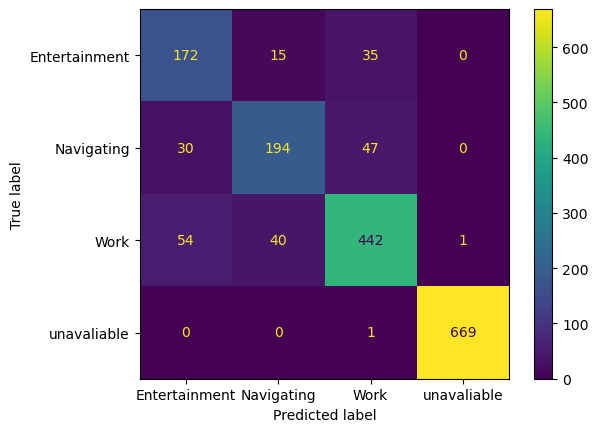

In [62]:
# make prediction
y_pred_rfc_lda = rfc_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_rfc_lda))
print(f'Train accuracy:\t {rfc_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {rfc_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Random Forest LDA'] = rfc_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_rfc_lda)

### KNeighbors Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
neigh_lda = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
neigh_lda.fit(X_train_lda, y_train_lda)

KNeighborsClassifier()

               precision    recall  f1-score   support

Entertainment       0.70      0.78      0.74       222
   Navigating       0.82      0.69      0.75       271
         Work       0.84      0.86      0.85       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.88      1700
    macro avg       0.84      0.83      0.83      1700
 weighted avg       0.88      0.88      0.88      1700

Train accuracy:	 0.9018668012108981
Test accuracy:	 0.8776470588235294


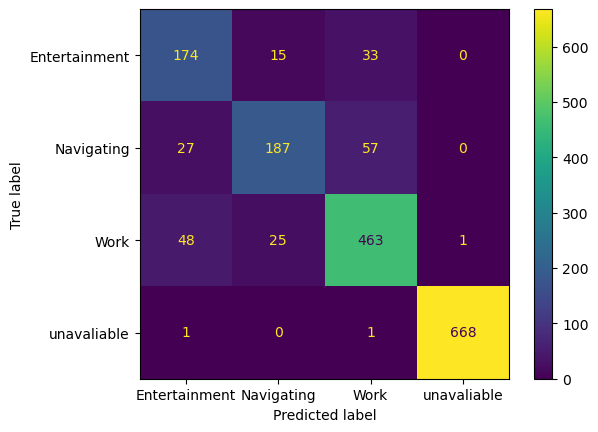

In [64]:
# make prediction
y_pred_neigh_lda = neigh_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_neigh_lda))
print(f'Train accuracy:\t {neigh_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {neigh_lda.score(X_test_lda, y_test_lda)}')
scores_lda['KNN LDA'] =  neigh_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_neigh_lda)

### MLP

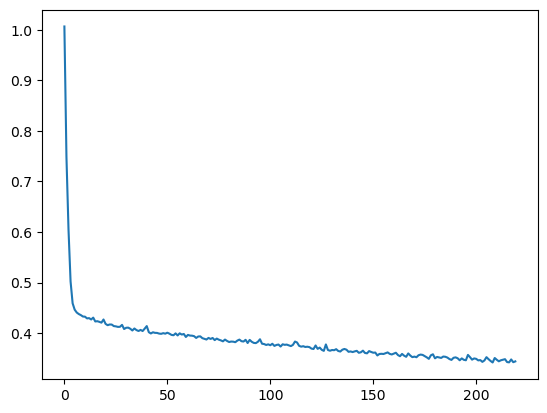

In [65]:
# build MLP classifier
model_lda = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_lda.fit(X_train_lda, y_train_lda)
plt.plot(model_lda.loss_curve_)

               precision    recall  f1-score   support

Entertainment       0.72      0.68      0.70       222
   Navigating       0.74      0.68      0.71       271
         Work       0.79      0.83      0.81       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.85      1700
    macro avg       0.81      0.80      0.80      1700
 weighted avg       0.85      0.85      0.85      1700

Train accuracy:	 0.8609989909182644
Test accuracy:	 0.8529411764705882


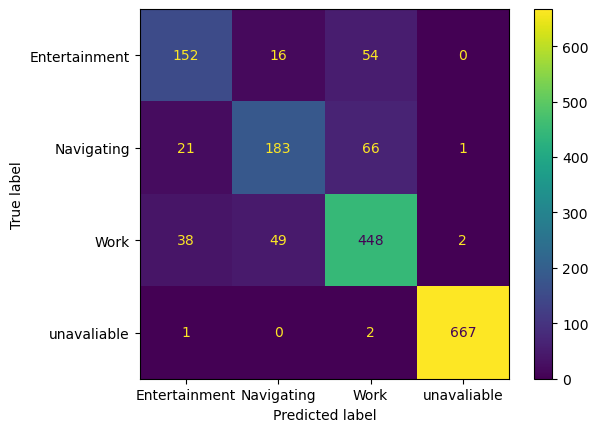

In [66]:
# make prediction
y_pred_mlp_lda = model_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_mlp_lda))
print(f'Train accuracy:\t {model_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {model_lda.score(X_test_lda, y_test_lda)}')
scores_lda['MLP_LDA'] =  model_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda,y_pred_mlp_lda)

# Final scores

<BarContainer object of 4 artists>

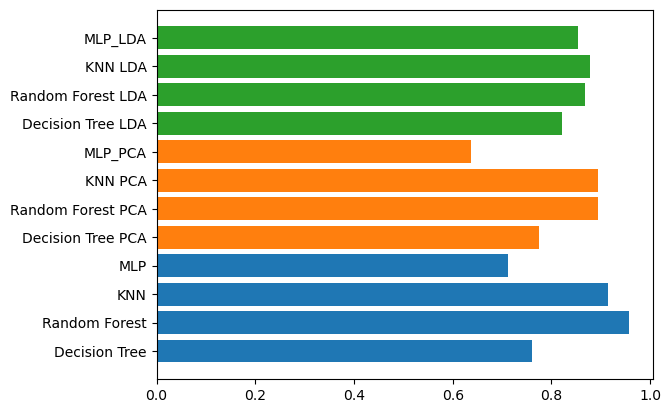

In [67]:
plt.barh(list(scores.keys()), scores.values())
plt.barh(list(scores_pca.keys()), scores_pca.values())
plt.barh(list(scores_lda.keys()), scores_lda.values())

In [68]:
scores

{'Decision Tree': 0.7611764705882353,
 'Random Forest': 0.9570588235294117,
 'KNN': 0.9147058823529411,
 'MLP': 0.7111764705882353}

In [69]:
scores_pca

{'Decision Tree PCA': 0.7747058823529411,
 'Random Forest PCA': 0.8941176470588236,
 'KNN PCA': 0.8952941176470588,
 'MLP_PCA': 0.6370588235294118}

In [70]:
scores_lda

{'Decision Tree LDA': 0.8205882352941176,
 'Random Forest LDA': 0.8688235294117647,
 'KNN LDA': 0.8776470588235294,
 'MLP_LDA': 0.8529411764705882}

In [71]:
# get the highest accuracy
max(max(scores.values()), max(scores_pca.values()), max(scores_lda.values()))

0.9570588235294117

# Normalized values

In [72]:
from sklearn.preprocessing import MinMaxScaler

# normalize values
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.35453475, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35453475, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35453475, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1875    , 0.35414213, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.1796875 , 0.35453475, 0.45      , ..., 0.        , 0.        ,
        1.        ],
       [0.1796875 , 0.35453475, 0.45      , ..., 0.        , 0.        ,
        1.        ]])

In [73]:
# split X and y into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape)

(3964, 48) (1700, 48) (3964,) (1700,)


# Classification models

In [74]:
scores_scaled = {}

# AdaBoost Classifier with Normalized values

In [75]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_scaled, y_train_scaled)

y_pred_abc_scaled = abc.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_scaled = confusion_matrix(y_test_scaled, y_pred_abc_scaled)
print (cm_scaled)
acc_abc_scaled = accuracy_score(y_test_scaled, y_pred_abc_scaled)
print (acc_abc_scaled)

[[ 67  91  64   0]
 [ 54 153  64   0]
 [126 216 195   0]
 [  0   0 667   3]]
0.24588235294117647


# Naïve Bayes with Normalized values

In [76]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_scaled)

GaussianNB()

In [77]:
y_pred_scaled = nb.predict(X_test_scaled)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_scaled = confusion_matrix(y_test_scaled, y_pred_scaled)
print(cm_scaled)
acc_nb_scaled = accuracy_score(y_test_scaled, y_pred_scaled)
print(acc_nb_scaled)

[[135  25  62   0]
 [110  97  64   0]
 [182  56 297   2]
 [  1   0   5 664]]
0.701764705882353


# Kernel SVM (Support Vector Machine)

In [79]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train_scaled, y_train_scaled)

SVC(random_state=0)

In [80]:
y_pred_svc_rbf_scaled = svc_rbf.predict(X_test_scaled)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_scaled = confusion_matrix(y_test_scaled, y_pred_svc_rbf_scaled)
print (cm_scaled)
acc_svc_rbf_scaled = accuracy_score(y_test_scaled, y_pred_svc_rbf_scaled)
print (acc_svc_rbf_scaled)

[[168   7  47   0]
 [ 11 199  61   0]
 [ 26  20 491   0]
 [  0   0   4 666]]
0.8964705882352941


## Decision tree Classifier

In [83]:
# build decision tree classifier
clf_gini_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_scaled.fit(X_train_scaled, y_train_scaled)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.60      0.25      0.35       222
   Navigating       0.92      0.25      0.39       271
         Work       0.58      0.94      0.72       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.76      1700
    macro avg       0.77      0.61      0.61      1700
 weighted avg       0.80      0.76      0.73      1700

Train accuracy:	 0.777497477295661
Test accuracy:	 0.7611764705882353


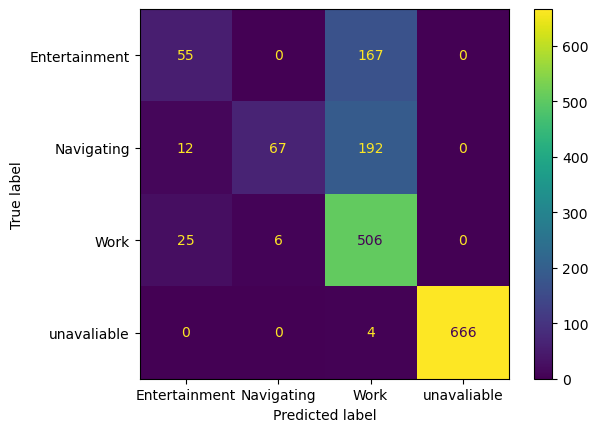

In [84]:
# make prediction
y_pred_clf_gini_scaled = clf_gini_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_clf_gini_scaled))
print(f'Train accuracy:\t {clf_gini_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {clf_gini_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Decision Tree (scaled)'] =  clf_gini_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_clf_gini_scaled)

## Random Forest

In [85]:
# build random forest classifier
rfc_scaled = RandomForestClassifier()
# train random forest
rfc_scaled.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier()

               precision    recall  f1-score   support

Entertainment       0.92      0.91      0.91       222
   Navigating       0.95      0.87      0.91       271
         Work       0.92      0.96      0.94       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.96      1700
    macro avg       0.95      0.94      0.94      1700
 weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 1.0
Test accuracy:	 0.9552941176470588


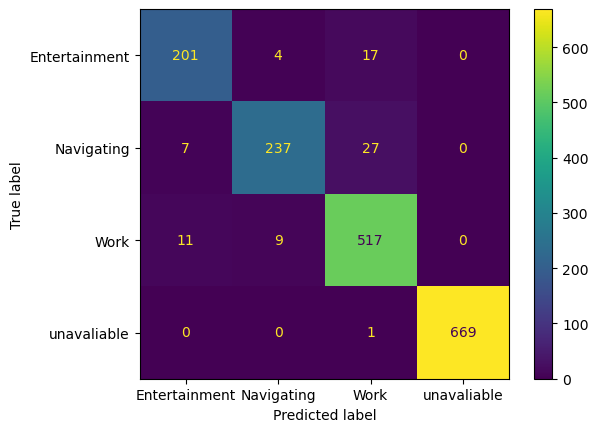

In [86]:
# make prediction
y_pred_rfc_scaled = rfc_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_rfc_scaled))
print(f'Train accuracy:\t {rfc_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {rfc_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Random Forest (scaled)'] = rfc_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_rfc_scaled)

## KNeighbors Classifier

In [87]:
# build KNeighbors classifier
neigh_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
neigh_scaled.fit(X_train_scaled, y_train_scaled)

KNeighborsClassifier(n_neighbors=2)

               precision    recall  f1-score   support

Entertainment       0.79      0.94      0.86       222
   Navigating       0.85      0.86      0.85       271
         Work       0.95      0.87      0.90       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.93      1700
    macro avg       0.89      0.92      0.90      1700
 weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9697275479313825
Test accuracy:	 0.9258823529411765


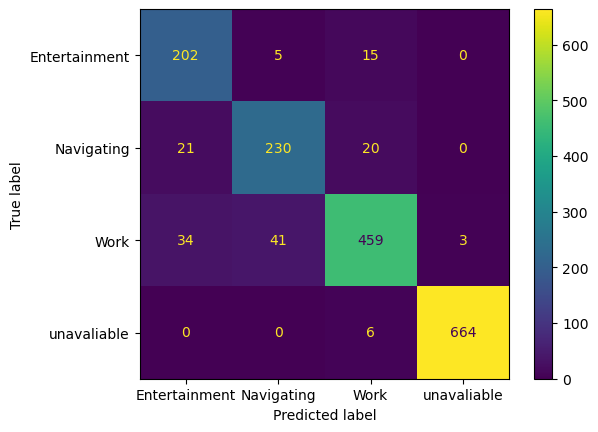

In [88]:
# make prediction
y_pred_neigh_scaled = neigh_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_neigh_scaled))
print(f'Train accuracy:\t {neigh_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {neigh_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['KNN (scaled)'] =  neigh_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_neigh)

## MLP

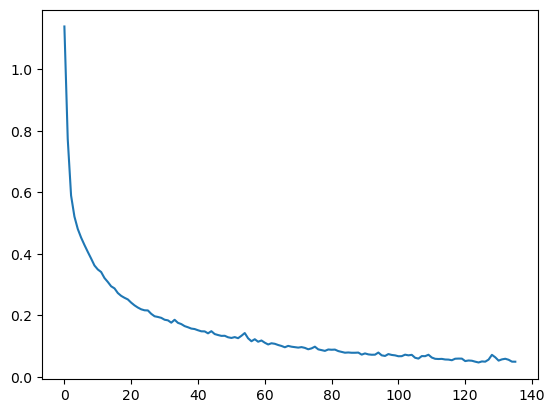

In [89]:
# build MLP classifier
model_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_scaled.fit(X_train_scaled, y_train_scaled)
plt.plot(model_scaled.loss_curve_)

               precision    recall  f1-score   support

Entertainment       0.90      0.86      0.88       222
   Navigating       0.85      0.85      0.85       271
         Work       0.91      0.93      0.92       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.94      1700
    macro avg       0.92      0.91      0.91      1700
 weighted avg       0.94      0.94      0.94      1700

Train accuracy:	 0.9830978809283552
Test accuracy:	 0.9352941176470588


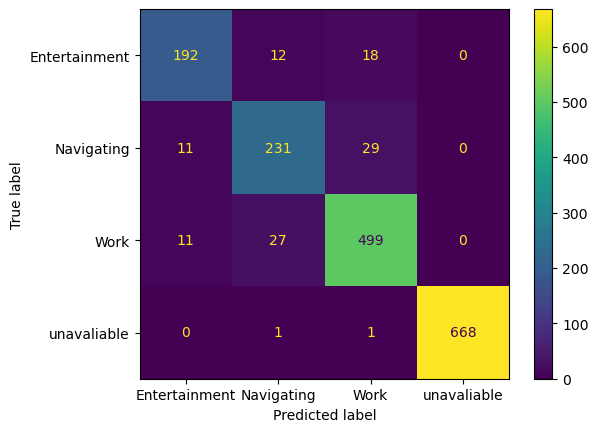

In [90]:
# make prediction
y_pred_mlp_scaled = model_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_mlp_scaled))
print(f'Train accuracy:\t {model_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {model_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['MLP (scaled)'] =  model_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_mlp_scaled)

## PCA Classifier

In [91]:
scores_pca_scaled = {}

In [92]:
pca_scaled = PCA(n_components=25)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

X_pca_scaled.shape, y.shape

((5664, 25), (5664,))

In [93]:
pca_scaled.explained_variance_ratio_

array([0.39159152, 0.11692   , 0.06783452, 0.05985748, 0.04324536,
       0.03805941, 0.03047002, 0.02828537, 0.02616819, 0.02180613,
       0.01992632, 0.01797033, 0.0155411 , 0.01395083, 0.01111676,
       0.00935957, 0.00862932, 0.00772839, 0.00717785, 0.00680049,
       0.00596581, 0.00561208, 0.0050704 , 0.00478371, 0.00410776])

In [94]:
pca_scaled.explained_variance_ratio_.sum()

0.9679787254419069

In [95]:
# split X and y into training and testing sets
X_train_pca_scaled, X_test_pca_scaled, y_train_pca_scaled, y_test_pca_scaled = train_test_split(X_pca_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca_scaled.shape, X_test_pca_scaled.shape, y_train_pca_scaled.shape, y_test_pca_scaled.shape)

(3964, 25) (1700, 25) (3964,) (1700,)


# AdaBoost Classifier with Normalized data and PCA

In [96]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_pca_scaled, y_train_pca_scaled)

y_pred_abc_pca_scaled = abc.predict(X_test_pca_scaled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca_scaled = confusion_matrix(y_test_pca_scaled, y_pred_abc_pca_scaled)
print (cm_pca_scaled)
acc_abc_pca_scaled = accuracy_score(y_test_pca_scaled, y_pred_abc_pca_scaled)
print (acc_abc_pca_scaled)

[[118  44  60   0]
 [111  91  69   0]
 [220 103 214   0]
 [  0   1 109 560]]
0.5782352941176471


# Naïve Bayes with Normalized data and PCA

In [97]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_pca_scaled, y_train_pca_scaled)

GaussianNB()

In [98]:
y_pred_pca_scaled = nb.predict(X_test_pca_scaled)

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca_scaled = confusion_matrix(y_test_pca_scaled, y_pred_pca_scaled)
print(cm_pca_scaled)
acc_nb_pca_scaled = accuracy_score(y_test_pca_scaled, y_pred_pca_scaled)
print(acc_nb_pca_scaled)

[[137  18  67   0]
 [ 38 139  94   0]
 [ 60  63 414   0]
 [  0   0   6 664]]
0.7964705882352942


# Kernel SVM (Support Vector Machine) with Normalized data and PCA

In [100]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train_pca_scaled, y_train_pca_scaled)

SVC(random_state=0)

In [101]:
y_pred_svc_rbf_pca_scaled = svc_rbf.predict(X_test_pca_scaled)

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca_scaled = confusion_matrix(y_test_pca_scaled, y_pred_svc_rbf_pca_scaled)
print (cm_pca_scaled)
acc_svc_rbf_pca_scaled = accuracy_score(y_test_pca_scaled, y_pred_svc_rbf_pca_scaled)
print (acc_svc_rbf_pca_scaled)

[[166  12  44   0]
 [ 10 200  61   0]
 [ 27  14 496   0]
 [  0   0   4 666]]
0.8988235294117647


### Decision tree

In [103]:
# build decision tree classifier
clf_gini_pca_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.79      0.39      0.52       222
   Navigating       0.70      0.55      0.61       271
         Work       0.67      0.89      0.76       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.81      1700
    macro avg       0.79      0.70      0.72      1700
 weighted avg       0.82      0.81      0.80      1700

Train accuracy:	 0.8145812310797175
Test accuracy:	 0.8094117647058824


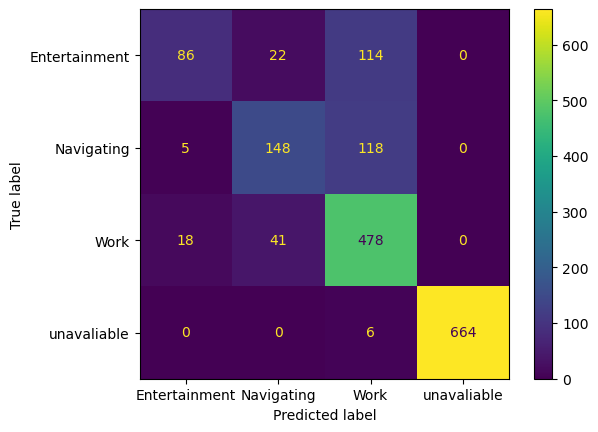

In [104]:
# make prediction
y_pred_clf_gini_pca_scaled = clf_gini_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_clf_gini_pca_scaled))
print(f'Train accuracy:\t {clf_gini_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {clf_gini_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Decision Tree PCA (scaled)'] =  clf_gini_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_clf_gini_pca_scaled)

### Random Forest

In [105]:
# build random forest classifier
rfc_pca_scaled = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

               precision    recall  f1-score   support

Entertainment       0.82      0.86      0.84       222
   Navigating       0.85      0.80      0.83       271
         Work       0.89      0.91      0.90       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.92      1700
    macro avg       0.89      0.89      0.89      1700
 weighted avg       0.92      0.92      0.92      1700

Train accuracy:	 0.987891019172553
Test accuracy:	 0.9188235294117647


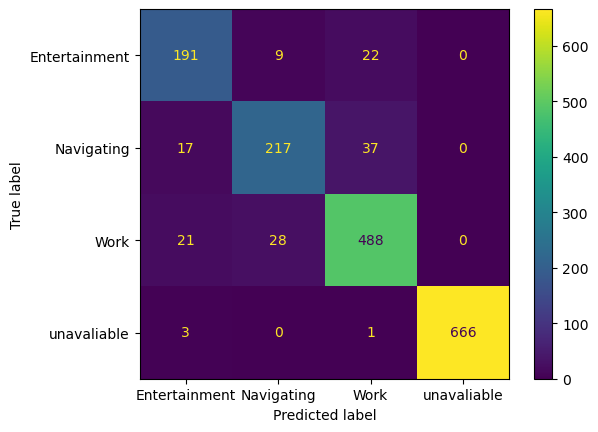

In [106]:
# make prediction
y_pred_rfc_pca_scaled = rfc_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_rfc_pca_scaled))
print(f'Train accuracy:\t {rfc_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {rfc_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Random Forest PCA (scaled)'] = rfc_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_rfc_pca_scaled)

### KNeighbors Classifier

In [107]:
# build KNeighbors classifier
neigh_pca_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
neigh_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

KNeighborsClassifier(n_neighbors=2)

               precision    recall  f1-score   support

Entertainment       0.80      0.94      0.86       222
   Navigating       0.83      0.88      0.85       271
         Work       0.95      0.86      0.91       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.93      1700
    macro avg       0.90      0.92      0.91      1700
 weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9669525731584259
Test accuracy:	 0.9276470588235294


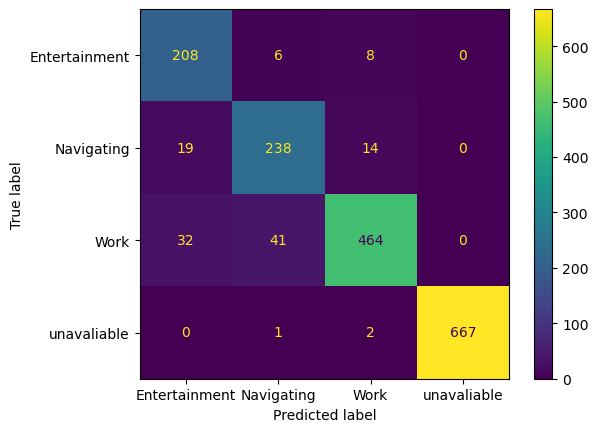

In [108]:
# make prediction
y_pred_neigh_pca_scaled = neigh_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_neigh_pca_scaled))
print(f'Train accuracy:\t {neigh_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {neigh_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['KNN PCA (scaled)'] =  neigh_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_neigh_pca_scaled)

### MLP

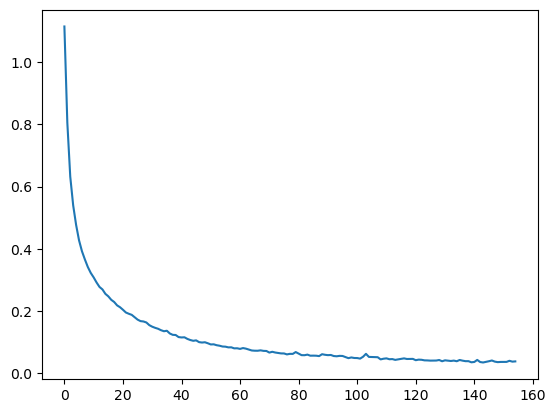

In [109]:
# build MLP classifier
model_pca_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)
plt.plot(model_pca_scaled.loss_curve_)

               precision    recall  f1-score   support

Entertainment       0.89      0.89      0.89       222
   Navigating       0.89      0.88      0.88       271
         Work       0.92      0.93      0.93       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.94      1700
    macro avg       0.92      0.92      0.92      1700
 weighted avg       0.94      0.94      0.94      1700

Train accuracy:	 0.9889001009081736
Test accuracy:	 0.9429411764705883


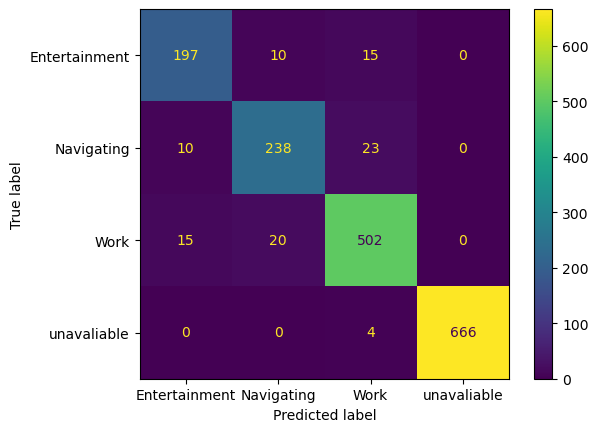

In [110]:
# make prediction
y_pred_mlp_pca_scaled = model_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_mlp_pca_scaled))
print(f'Train accuracy:\t {model_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {model_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['MLP PCA (scaled)'] =  model_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_mlp_pca_scaled)

## LDA Classifier

In [111]:
scores_lda_scaled = {}

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_scaled = LinearDiscriminantAnalysis(n_components=3)
X_lda_scaled = lda_scaled.fit(X_scaled, y).transform(X_scaled)
X_lda_scaled.shape

(5664, 3)

In [113]:
# split X and y into training and testing sets
X_train_lda_scaled, X_test_lda_scaled, y_train_lda_scaled, y_test_lda_scaled = train_test_split(X_lda_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda_scaled.shape, X_test_lda_scaled.shape, y_train_lda_scaled.shape, y_test_lda_scaled.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


# AdaBoost Classifier with Normalized data and LDA

In [114]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_lda_scaled, y_train_lda_scaled)

y_pred_abc_lda_scaled = abc.predict(X_test_lda_scaled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_lda_scaled = confusion_matrix(y_test_lda_scaled, y_pred_abc_lda_scaled)
print (cm_lda_scaled)
acc_abc_lda_scaled = accuracy_score(y_test_lda_scaled, y_pred_abc_lda_scaled)
print (acc_abc_lda_scaled)

[[155  39  28   0]
 [ 58 196  17   0]
 [ 80 197 256   4]
 [  0   0   1 669]]
0.7505882352941177


# Naïve Bayes with Normalized data and LDA

In [115]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_lda_scaled, y_train_lda_scaled)

GaussianNB()

In [116]:
y_pred_lda_scaled = nb.predict(X_test_lda_scaled)

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_lda_scaled = confusion_matrix(y_test_lda_scaled, y_pred_lda_scaled)
print(cm_lda_scaled)
acc_nb_lda_scaled = accuracy_score(y_test_lda_scaled, y_pred_lda_scaled)
print(acc_nb_lda_scaled)

[[137  14  71   0]
 [ 37 132 101   1]
 [ 44  36 456   1]
 [  2   0   4 664]]
0.8170588235294117


# Kernel SVM (Support Vector Machine) with Normalized data and LDA

In [118]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train_lda_scaled, y_train_lda_scaled)

SVC(random_state=0)

In [119]:
y_pred_svc_rbf_lda_scaled = svc_rbf.predict(X_test_lda_scaled)

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_lda_scaled = confusion_matrix(y_test_lda_scaled, y_pred_svc_rbf_lda_scaled)
print (cm_lda_scaled)
acc_svc_rbf_lda_scaled = accuracy_score(y_test_lda_scaled, y_pred_svc_rbf_lda_scaled)
print (acc_svc_rbf_lda_scaled)

[[122  17  83   0]
 [ 22 140 108   1]
 [ 41  33 461   2]
 [  2   0   2 666]]
0.8170588235294117


### Decision tree

In [121]:
# build decision tree classifier
clf_gini_lda_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.66      0.59      0.62       222
   Navigating       0.78      0.49      0.60       271
         Work       0.70      0.87      0.78       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.82      1700
    macro avg       0.78      0.74      0.75      1700
 weighted avg       0.83      0.82      0.81      1700

Train accuracy:	 0.8375378405650857
Test accuracy:	 0.8205882352941176


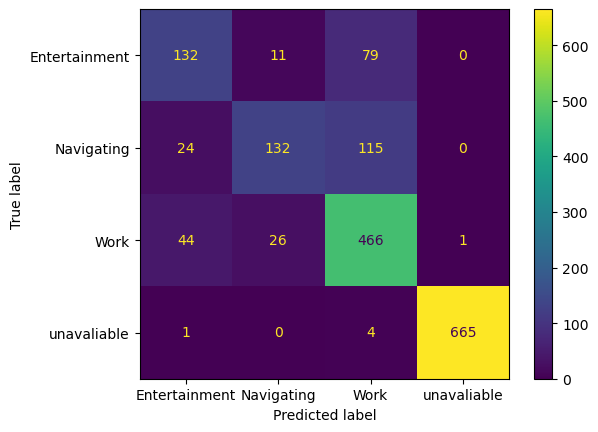

In [122]:
# make prediction
y_pred_clf_gini_lda_scaled = clf_gini_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_clf_gini_lda_scaled))
print(f'Train accuracy:\t {clf_gini_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {clf_gini_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Decision Tree LDA (scaled)'] =  clf_gini_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_clf_gini_lda_scaled)

### Random Forest

In [123]:
# build random forest classifier
rfc_lda_scaled = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

               precision    recall  f1-score   support

Entertainment       0.67      0.77      0.72       222
   Navigating       0.78      0.72      0.75       271
         Work       0.84      0.82      0.83       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.87      1700
    macro avg       0.82      0.83      0.82      1700
 weighted avg       0.87      0.87      0.87      1700

Train accuracy:	 0.9808274470232089
Test accuracy:	 0.8688235294117647


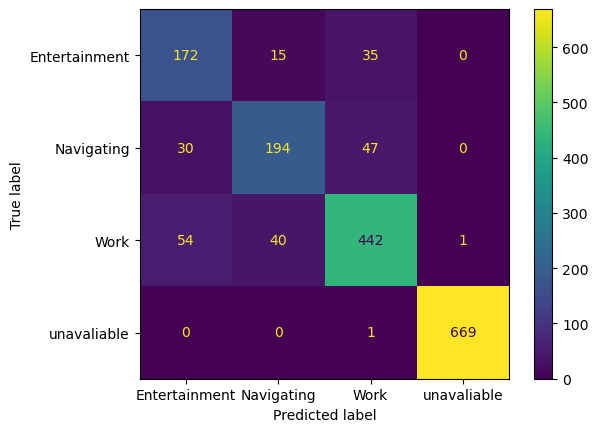

In [124]:
# make prediction
y_pred_rfc_lda_scaled = rfc_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_rfc_lda_scaled))
print(f'Train accuracy:\t {rfc_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {rfc_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Random Forest LDA (scaled)'] = rfc_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_rfc_lda_scaled)

### KNeighbors Classifier

In [125]:
# build KNeighbors classifier
neigh_lda_scaled = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
neigh_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

KNeighborsClassifier()

               precision    recall  f1-score   support

Entertainment       0.70      0.78      0.74       222
   Navigating       0.82      0.69      0.75       271
         Work       0.84      0.86      0.85       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.88      1700
    macro avg       0.84      0.83      0.83      1700
 weighted avg       0.88      0.88      0.88      1700

Train accuracy:	 0.9018668012108981
Test accuracy:	 0.8776470588235294


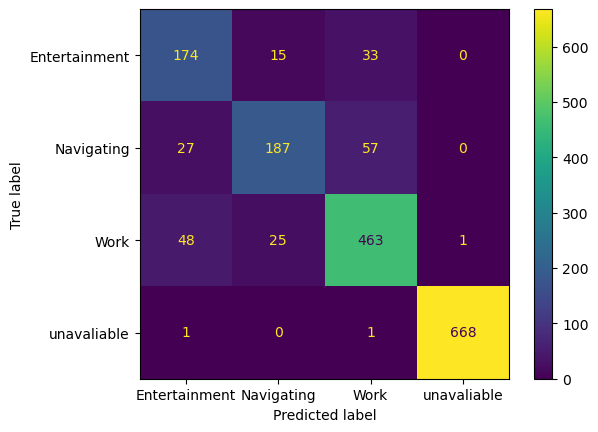

In [126]:
# make prediction
y_pred_neigh_lda_scaled = neigh_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_neigh_lda_scaled))
print(f'Train accuracy:\t {neigh_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {neigh_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['KNN LDA (scaled)'] =  neigh_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_neigh_lda_scaled)

### MLP

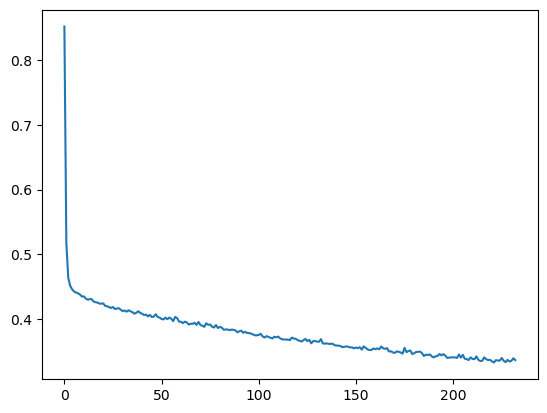

In [127]:
# build MLP classifier
model_lda_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)
plt.plot(model_lda_scaled.loss_curve_)

               precision    recall  f1-score   support

Entertainment       0.73      0.70      0.72       222
   Navigating       0.72      0.72      0.72       271
         Work       0.80      0.82      0.81       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.86      1700
    macro avg       0.81      0.81      0.81      1700
 weighted avg       0.86      0.86      0.86      1700

Train accuracy:	 0.8652875882946519
Test accuracy:	 0.8582352941176471


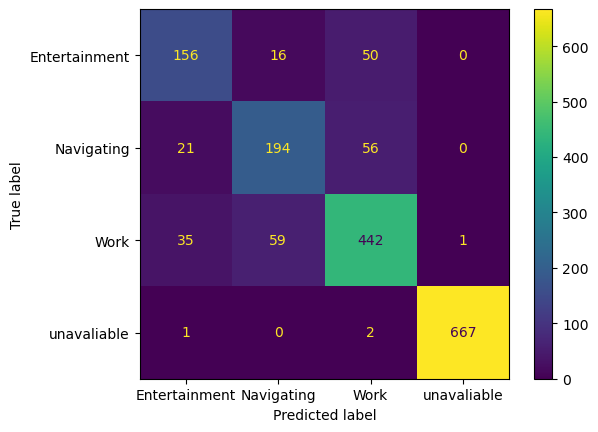

In [128]:
# make prediction
y_pred_mlp_lda_scaled = model_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_mlp_lda_scaled))
print(f'Train accuracy:\t {model_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {model_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['MLP LDA (scaled)'] =  model_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_mlp_lda_scaled)

# Final scores

<BarContainer object of 4 artists>

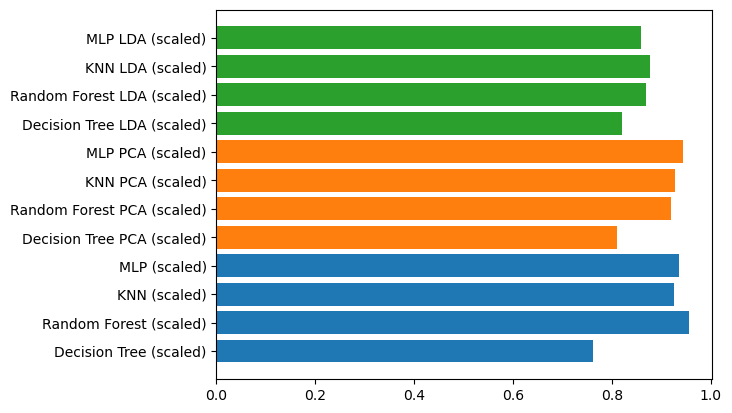

In [129]:
plt.barh(list(scores_scaled.keys()), scores_scaled.values())
plt.barh(list(scores_pca_scaled.keys()), scores_pca_scaled.values())
plt.barh(list(scores_lda_scaled.keys()), scores_lda_scaled.values())

In [130]:
scores_scaled

{'Decision Tree (scaled)': 0.7611764705882353,
 'Random Forest (scaled)': 0.9552941176470588,
 'KNN (scaled)': 0.9258823529411765,
 'MLP (scaled)': 0.9352941176470588}

In [131]:
scores_pca_scaled

{'Decision Tree PCA (scaled)': 0.8094117647058824,
 'Random Forest PCA (scaled)': 0.9188235294117647,
 'KNN PCA (scaled)': 0.9276470588235294,
 'MLP PCA (scaled)': 0.9429411764705883}

In [132]:
scores_lda_scaled

{'Decision Tree LDA (scaled)': 0.8205882352941176,
 'Random Forest LDA (scaled)': 0.8688235294117647,
 'KNN LDA (scaled)': 0.8776470588235294,
 'MLP LDA (scaled)': 0.8582352941176471}

In [133]:
# get the highest accuracy
max(max(scores_scaled.values()), max(scores_pca_scaled.values()), max(scores_lda_scaled.values()))

0.9552941176470588